In [7]:
from sklearn.tree import DecisionTreeClassifier  # sotring whole algo
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
#tree #KNN #Log #GAussinab #Rf #SVC #SVM
from sys import argv
from sklearn import metrics
import numpy as np   # array
import pandas as pd  # read + plot
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix #report
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import LabelEncoder #convert data
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
import pandas as pd
from imblearn.over_sampling import ADASYN, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids, NearMiss, EditedNearestNeighbours
from imblearn.pipeline import Pipeline
from imblearn.datasets import make_imbalance
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier



In [8]:
from google.colab import drive
import pandas as pd
# Mount Google Drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/liver deases/liver.csv")



In [ ]:
train

In [ ]:
# Convert "Gender" column values to 1 for male and 2 for female
train['Gender'] = train['Gender'].replace({'Male': 1, 'Female': 2})
train['Selector'] = train['Selector'].replace({1:1 , 2: 0})
train['A/G Ratio'].fillna(train['A/G Ratio'].median(), inplace=True)

In [ ]:
train

In [ ]:
train.isnull().sum()

In [ ]:
# missing values with the median
train['A/G Ratio'].fillna(train['A/G Ratio'].median(), inplace=True)

In [ ]:
train.isnull().sum()

In [ ]:
train['Selector'].value_counts()

1    416
0    167
Name: Selector, dtype: int64

In [ ]:
train.info()

# Balancing dataset

In [ ]:
X1 = train.drop("Selector", axis=1)
y1 = train['Selector']
smote = SMOTE(random_state=42)
X1_resampled_smote, y1_resampled_smote = smote.fit_resample(X1, y1)
smote_balanced1= pd.concat([X1_resampled_smote, y1_resampled_smote], axis=1)

In [ ]:

# Apply ADASYN oversampling
adasyn = ADASYN(random_state=42)
X1_resampled, y1_resampled = adasyn.fit_resample(X1, y1)
#-------------------------------------------------------------------------------------------------------------------------------------------------------

# Apply SMOTE oversampling
smote = SMOTE(random_state=42)
X1_resampled_smote, y1_resampled_smote = smote.fit_resample(X1, y1)
#-------------------------------------------------------------------------------------------------------------------------------------------------------

#-------------------------------------------------------------------------------------------------------------------------------------------------------

#-------------------------------------------------------------------------------------------------------------------------------------------------------
# Apply Tomek Links
tomek = TomekLinks()
X1_resampled_tomek, y1_resampled_tomek = tomek.fit_resample(X1, y1)
#-------------------------------------------------------------------------------------------------------------------------------------------------------

# Apply1 Cluster Centroids
cluster_centroids = ClusterCentroids()
X1_resampled_cluster, y1_resampled_cluster = cluster_centroids.fit_resample(X1, y1)
#-------------------------------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------------------------------
# Apply Edited Nearest Neighbours
enn = EditedNearestNeighbours()
X1_resampled_enn, y1_resampled_enn = enn.fit_resample(X1, y1)
#-------------------------------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------------------------------


# Apply random undersampling
undersampler = RandomUnderSampler(random_state=42)
X1_resampled_ran, y1_resampled_ran = undersampler.fit_resample(X1, y1)

# Print the balanced dataset
adasyn_balanced1= pd.concat([X1_resampled, y1_resampled], axis=1)
smote_balanced1= pd.concat([X1_resampled_smote, y1_resampled_smote], axis=1)
tomek_balanced1= pd.concat([X1_resampled_tomek, y1_resampled_tomek],  axis=1)
random_balanced1= pd.concat([X1_resampled_ran, y1_resampled_ran],  axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df= pd.concat([X1_resampled,y1_resampled, X1_resampled_smote,y1_resampled_smote, X1_resampled_tomek, X1_resampled_cluster,X1_resampled_enn, X1_resampled_ran ]  )

In [ ]:
df.shape

(3205, 10)

In [ ]:
smote_balanced1['Selector'].value_counts()

1    416
0    416
Name: Selector, dtype: int64

In [ ]:
X_adasyn = adasyn_balanced1.drop('Selector', axis=1)
y_adasyn = adasyn_balanced1['Selector']
#--------------------------------------------
X_smote = smote_balanced1.drop('Selector', axis=1)
y_smote = smote_balanced1['Selector']
#--------------------------------------------
X_random = random_balanced1.drop('Selector', axis=1)
y_random = random_balanced1['Selector']
#--------------------------------------------
#--------------------------------------------
X_tomek = tomek_balanced1.drop('Selector', axis=1)
y_tomek = tomek_balanced1['Selector']
#----------------------------------------------


# Smote

In [ ]:

X = smote_balanced1.drop("Selector", axis=1)
y = smote_balanced1["Selector"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### CODE + model apply on balancing dataset

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.4 MB/s eta 0:00:00


In [ ]:

# from catboost import CatBoostClassifier
lr= LogisticRegression(random_state=10,penalty='l2',solver='lbfgs',multi_class="ovr")
rf= RandomForestClassifier(n_estimators=100,criterion='entropy',max_features="sqrt",random_state=100)
svc = SVC(kernel='poly', degree = 3)
knn=KNeighborsClassifier(n_neighbors=10)
#svm = svm.SVC(kernel='linear', C=1)
ridge=RidgeClassifier()
#cat = CatBoostClassifier()
ada=AdaBoostClassifier()
sgd=SGDClassifier()
ex=ExtraTreesClassifier(n_estimators=100, random_state=10)
la=LinearDiscriminantAnalysis()
lsv=LinearSVC()
dt=DecisionTreeClassifier(max_depth=10,criterion='gini',min_samples_split=10)
mlp= MLPClassifier(activation='relu', solver='lbfgs', max_iter=160, random_state=100,alpha=0.0001,learning_rate='invscaling')
knn= KNeighborsClassifier(n_neighbors=100,metric='manhattan',weights='distance',algorithm="kd_tree")
lgbm = LGBMClassifier(num_leaves=150, max_depth=100, learning_rate=0.1, n_estimators=100, subsample=1.0,colsample_bytree=1.0, reg_alpha=30, reg_lambda=10)
xgb = XGBClassifier(n_estimators=100, max_depth=100, learning_rate=0.1, subsample=1.0, colsample_bytree=1.0, reg_alpha=30, reg_lambda=30, gamma=0, min_child_weight=1)

In [ ]:
#VOTING (HARD)
from sklearn.ensemble import  VotingClassifier
vth1 = VotingClassifier(estimators=[('lr', lr), ('knn', knn), ('dt', dt),('mlp',mlp)], voting='soft')
vth2 = VotingClassifier(estimators=[('xgb', xgb), ('lr', lr), ('knn', knn), ('dt', dt)], voting='hard')
vth3 = VotingClassifier(estimators=[('xgb', xgb), ('lr', lr), ('knn', knn),('lgbm',lgbm)], voting='hard')
vth4 = VotingClassifier(estimators=[ ('lgbm', lgbm),('rf',rf)], voting='hard')
vth5 = VotingClassifier(estimators=[ ('lgbm', lgbm),('knn',knn)], voting='hard')
vth6 = VotingClassifier(estimators=[ ('lgbm', lgbm),('dt',dt)], voting='hard')
vth7 = VotingClassifier(estimators=[ ('lgbm', lgbm),('mlp',mlp)], voting='hard')
vth8 = VotingClassifier(estimators=[ ('dt', dt),('xgb', xgb)], voting='hard')

In [ ]:
#STACK
from sklearn.ensemble import StackingClassifier
stk1 = StackingClassifier(estimators=[('lgbm', lgbm),('xgb',xgb)], final_estimator=LogisticRegression())
stk2 = StackingClassifier(estimators=[('dt',dt),('knn', knn)], final_estimator=LogisticRegression())
stk3 = StackingClassifier(estimators=[('xgb',rf),('knn', knn)], final_estimator=LogisticRegression())
stk4 = StackingClassifier(estimators=[('xgb', xgb), ('lr', lr), ('knn', knn),('lgbm',lgbm)], final_estimator=LogisticRegression())
stk5 = StackingClassifier(estimators=[('xgb', xgb), ('mlp', mlp), ('dt', dt),('lgbm',lgbm)], final_estimator=LogisticRegression())
stk6 = StackingClassifier(estimators=[('xgb', xgb), ('rf', rf), ('ex', ex)], final_estimator=LogisticRegression())

In [ ]:
# ex = ExtraTreesClassifier(n_estimators=100, random_state=10)
# lr= LogisticRegression(random_state=10,penalty='l2',solver='lbfgs',multi_class="ovr")
# rf= RandomForestClassifier(n_estimators=100,criterion='entropy',max_features="sqrt",random_state=100)
# svc = SVC(kernel='poly', degree = 3)
# knn=KNeighborsClassifier(n_neighbors=10)
# #svm = svm.SVC(kernel='linear', C=1)
# ridge=RidgeClassifier()
# ada=AdaBoostClassifier()
# sgd=SGDClassifier()
# ex=ExtraTreesClassifier(n_estimators=100, random_state=10)
# la=LinearDiscriminantAnalysis()
# lsv=LinearSVC()
# dt=DecisionTreeClassifier(max_depth=10,criterion='gini',min_samples_split=10)
# mlp= MLPClassifier()
# knn= KNeighborsClassifier(n_neighbors=100,metric='manhattan',weights='distance',algorithm="kd_tree")
# lgbm = LGBMClassifier(num_leaves=150, max_depth=100, learning_rate=0.1, n_estimators=100, subsample=1.0,colsample_bytree=1.0, reg_alpha=30, reg_lambda=10)
# xgb = XGBClassifier(n_estimators=100, max_depth=100, learning_rate=0.1, subsample=1.0, colsample_bytree=1.0, reg_alpha=30, reg_lambda=30, gamma=0, min_child_weight=1)


model_list1 = [lr,rf,svc,knn,ex,mlp,xgb,lgbm,ada]
model_list = [lr,rf,dt,mlp,knn,lgbm,xgb,vth1,vth2,vth3,vth4,vth5,vth6,vth7,vth8,stk1,stk2,stk3,stk4,stk5,stk6,ex]

In [ ]:
X = train.drop("Selector", axis=1)
y = train["Selector"]

In [ ]:
from sklearn.model_selection import train_test_split

X = train.drop("Selector", axis=1)
y = train["Selector"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
results = []

for model in model_list:
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate sensitivity, specificity, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    # Store the results in a dictionary
    result = {
        'Model': str(model),
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity

    }

    # Append the result to the results list
    results.append(result)

# Print the results
for result in results:
    print(result)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 329, number of negative: 137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 552
[LightGBM] [Info] Number of data points in the train set: 466, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.706009 -> initscore=0.876077
[LightGBM] [Info] Start training from score 0.876077
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: C

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 329, number of negative: 137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 552
[LightGBM] [Info] Number of data points in the train set: 466, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.706009 -> initscore=0.876077
[LightGBM] [Info] Start training from score 0.876077
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 329, number of negative: 137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 552
[LightGBM] [Info] Number of data points in the train set: 466, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.706009 -> initscore=0.876077
[LightGBM] [Info] Start training from score 0.876077
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 329, number of negative: 137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 552
[LightGBM] [Info] Number of data points in the train set: 466, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.706009 -> initscore=0.876077
[LightGBM] [Info] Start training from score 0.876077
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 263, number of negative: 109
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 494
[LightGBM] [Info] Number of data points in the train set: 372, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.706989 -> initscore=0.880806
[LightGBM] [Info] Start training from score 0.880806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [W

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 329, number of negative: 137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 552
[LightGBM] [Info] Number of data points in the train set: 466, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.706009 -> initscore=0.876077
[LightGBM] [Info] Start training from score 0.876077
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 263, number of negative: 109
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 494
[LightGBM] [Info] Number of data points in the train set: 372, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.706989 -> initscore=0.880806
[LightGBM] [Info] Start training from score 0.880806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

### 10m model

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, matthews_corrcoef, f1_score

results = []

for model in model_list:
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate sensitivity, specificity, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_pred)

    # Calculate MCC (Matthews correlation coefficient)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)

    # Store the results in a dictionary
    result = {
        'Model': str(model),
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'AUC': auc_score,
        'MCC': mcc,
        'F1 Score': f1
    }

    # Append the result to the results list
    results.append(result)

# Print the results
for result in results:
    print(result)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 329, number of negative: 137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 552
[LightGBM] [Info] Number of data points in the train set: 466, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.706009 -> initscore=0.876077
[LightGBM] [Info] Start training from score 0.876077
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: C

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 329, number of negative: 137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 552
[LightGBM] [Info] Number of data points in the train set: 466, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.706009 -> initscore=0.876077
[LightGBM] [Info] Start training from score 0.876077
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 329, number of negative: 137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 552
[LightGBM] [Info] Number of data points in the train set: 466, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.706009 -> initscore=0.876077
[LightGBM] [Info] Start training from score 0.876077
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 329, number of negative: 137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 552
[LightGBM] [Info] Number of data points in the train set: 466, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.706009 -> initscore=0.876077
[LightGBM] [Info] Start training from score 0.876077
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 263, number of negative: 109
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 494
[LightGBM] [Info] Number of data points in the train set: 372, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.706989 -> initscore=0.880806
[LightGBM] [Info] Start training from score 0.880806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 329, number of negative: 137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 552
[LightGBM] [Info] Number of data points in the train set: 466, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.706009 -> initscore=0.876077
[LightGBM] [Info] Start training from score 0.876077
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 263, number of negative: 109
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 494
[LightGBM] [Info] Number of data points in the train set: 372, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.706989 -> initscore=0.880806
[LightGBM] [Info] Start training from score 0.880806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

In [ ]:
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
results_df.to_csv('model_results.csv', index=False)

# Print the results
print(results_df)

                                                Model  Accuracy  Sensitivity  \
0   LogisticRegression(multi_class='ovr', random_s...  0.735043     0.919540   
1   RandomForestClassifier(criterion='entropy', ra...  0.752137     0.873563   
2   DecisionTreeClassifier(max_depth=10, min_sampl...  0.692308     0.747126   
3   MLPClassifier(learning_rate='invscaling', max_...  0.726496     0.862069   
4   KNeighborsClassifier(algorithm='kd_tree', metr...  0.752137     0.965517   
5   LGBMClassifier(max_depth=100, num_leaves=150, ...  0.743590     1.000000   
6   XGBClassifier(base_score=None, booster=None, c...  0.743590     1.000000   
7   VotingClassifier(estimators=[('lr',\n         ...  0.760684     0.885057   
8   VotingClassifier(estimators=[('xgb',\n        ...  0.760684     0.942529   
9   VotingClassifier(estimators=[('xgb',\n        ...  0.752137     0.977011   
10  VotingClassifier(estimators=[('lgbm',\n       ...  0.752137     0.873563   
11  VotingClassifier(estimators=[('lgbm'

### lgbm+et

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier


# LGBMClassifier
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)
lgbm_predictions = lgbm_model.predict(X_test)
lgbm_accuracy = accuracy_score(y_test, lgbm_predictions)
print("LGBMClassifier Accuracy:", lgbm_accuracy)

# ExtraTreesClassifier
et_model = ExtraTreesClassifier()
et_model.fit(X_train, y_train)
et_predictions = et_model.predict(X_test)
et_accuracy = accuracy_score(y_test, et_predictions)
print("ExtraTreesClassifier Accuracy:", et_accuracy)

# XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBClassifier Accuracy:", xgb_accuracy)

accuracy_rf = accuracy_score(y_test, xgb_predictions)
classification_report_rf = classification_report(y_test, xgb_predictions)
conf_matrix_rf = confusion_matrix(y_test, xgb_predictions)

print("\nRandom Forest Metrics:")
print(f'Accuracy: {xgb_accuracy}')
print('Classification Report:')
print(classification_report_rf)
print('Confusion Matrix:')
print(conf_matrix_rf)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 329, number of negative: 137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 552
[LightGBM] [Info] Number of data points in the train set: 466, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.706009 -> initscore=0.876077
[LightGBM] [Info] Start training from score 0.876077
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

### voting

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create the ensemble model
ensemble_model = VotingClassifier(
    estimators=[
        ('lgbm', lgbm),
        ('et', ex),
        ('xgb', xgb)
    ],
    voting='soft'  # Use 'hard' for majority voting
)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions on the test data
ensemble_predictions = ensemble_model.predict(X_test)

# Evaluate the accuracy of the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Model Accuracy:", ensemble_accuracy)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 329, number of negative: 137
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 552
[LightGBM] [Info] Number of data points in the train set: 466, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.706009 -> initscore=0.876077
[LightGBM] [Info] Start training from score 0.876077
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

### Pipeline wise

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn .ensemble import RandomForestClassifier
from sklearn .ensemble import VotingClassifier , BaggingClassifier , StackingClassifier
from sklearn.model_selection import LeaveOneOut,cross_val_score

dt = DecisionTreeClassifier(random_state=142)

bagging = BaggingClassifier(
    estimator = LogisticRegression(),
    n_estimators = 10
)
mlp= MLPClassifier(hidden_layer_sizes=100,random_state=142, max_iter=300,solver = 'lbfgs',activation = 'relu',learning_rate=0.01)
knn=KNeighborsClassifier(n_neighbors=10)
ex = ExtraTreesClassifier(n_estimators=100, criterion='log_loss',random_state=135)
base_models = [('ex',ex),('dt',dt),('bagging ',bagging) , ('KNN',knn)]

stacking = StackingClassifier(
    estimators = base_models ,
    final_estimator = LogisticRegression(penalty='l2')

)



In [ ]:
stacking.fit(X_train , y_train)
y_pred = stacking.predict(X_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.7521367521367521

# skew balancing

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/liver deases/liver.csv")



### ftr sampling

In [ ]:
from sklearn.preprocessing import PowerTransformer

power_transformer = PowerTransformer()
X_train_transformed = power_transformer.fit_transform(train)


ValueError: could not convert string to float: 'Female'

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mice_imputer = IterativeImputer(random_state=42)
df_imputed = pd.DataFrame(mice_imputer.fit_transform(train), columns=train.columns)


In [ ]:
import pandas as pd
from scipy.stats import skew

# Assuming 'df' is your DataFrame
numerical_features = ['Age', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'A/G Ratio']

skewness_values = df_imputed[numerical_features].apply(lambda x: skew(x))

# Display skewness values
skewness_df = pd.DataFrame({'Feature': skewness_values.index, 'Skewness': skewness_values.values})
print(skewness_df)


In [ ]:
train.columns

In [ ]:
from scipy.stats import boxcox

# Assuming 'df' is your DataFrame
transformed_sgot, _ = boxcox(df_imputed['Sgot'] + 1)  # Adding 1 to handle zero values
transformed_sgpt, _ = boxcox(df_imputed['Sgpt'] + 1)  # Adding 1 to handle zero values
transformed_tb, _ = boxcox(df_imputed['TB'] + 1)
# Replace the original 'Sgot' column with the transformed values
df_imputed['Sgot'] = transformed_sgot
df_imputed['Sgpt'] = transformed_sgpt
df_imputed['TB'] = transformed_tb

In [ ]:
X = df_imputed.drop("Selector", axis=1)
y = df_imputed["Selector"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression  # or any other model

# Assuming X_train is your feature variable and y_train is your target variable
model = LogisticRegression()
rfe_selector = RFE(model, n_features_to_select=5)  # Adjust the number of features as needed
X_train_rfe = rfe_selector.fit_transform(X_train, y_train)

# Get the indices of selected features
selected_feature_indices = np.where(rfe_selector.support_)[0]

# Get the names of selected features
selected_features = X_train.columns[selected_feature_indices]

# Extract the selected features from the original dataset
X_train_selected = X_train[selected_features]
X_train_selected['Selector'] = y_train

In [ ]:
X_train_selected['Selector'] = y_train

In [ ]:
X_train_selected.isnull().sum()

In [ ]:
X = train.drop("Selector", axis=1)
y = train["Selector"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### LR

In [ ]:



clf_lr = LogisticRegression(random_state=42, max_iter=1000)
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
classification_report_lr = classification_report(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

print("Logistic Regression Metrics:")
print(f'Accuracy: {accuracy_lr}')
print('Classification Report:')
print(classification_report_lr)
print('Confusion Matrix:')
print(conf_matrix_lr)

In [ ]:
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)


accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("\nRandom Forest Metrics:")
print(f'Accuracy: {accuracy_rf}')
print('Classification Report:')
print(classification_report_rf)
print('Confusion Matrix:')
print(conf_matrix_rf)

### New Section

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import boxcox
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# Assuming df is your original DataFrame and y_train is the target variable

# Step 1: Data Balancing
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 2: Feature Scaling
scaler_robust = RobustScaler()
X_train_robust = scaler_robust.fit_transform(X_train_resampled)

# Step 3: Multivariate Imputation
knn_imputer = KNNImputer()
df_imputed = pd.DataFrame(knn_imputer.fit_transform(train), columns=train.columns)

# Step 4: Log1p Transformation
df_sqrt_transformed = np.sqrt(df_imputed)

# Step 5: Feature Selection
model = LogisticRegression()
rfe_selector = RFE(model, n_features_to_select=5)  # Adjust the number of features as needed
X_train_rfe = rfe_selector.fit_transform(X_train_robust, y_train_resampled)

# Step 6: Principal Component Analysis (PCA)
pca = PCA(n_components=5)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train_robust)


In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Ass

# Create base models
xgb_model = XGBClassifier(learning_rate=0.1)
rf_model = RandomForestClassifier(n_estimators=50)
ex_model = ExtraTreesClassifier(n_estimators=10)

# Create the stacking classifier
stk6 = StackingClassifier(
    estimators=[('xgb', xgb_model), ('rf', rf_model), ('ex', ex_model)],
    final_estimator=LogisticRegression()
)

# Define parameter grid for grid search
param_grid = {
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__n_estimators': [50, 100, 200],
    'xgb__max_depth': [3, 4, 5],
    'xgb__min_child_weight': [1, 3, 5],  # Add other XGBoost parameters you want to tune
    'xgb__gamma': [0, 0.1, 0.2],

    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 3, 5, 7],
    'rf__min_samples_split': [2, 5, 10],  # Add other RandomForest parameters you want to tune
    'rf__min_samples_leaf': [1, 2, 4],

    'ex__n_estimators': [50, 100, 200],
    'ex__max_depth': [None, 3, 5, 7],
    'ex__min_samples_split': [2, 5, 10],  # Add other Extra Trees parameters you want to tune
    'ex__min_samples_leaf': [1, 2, 4],

    'final_estimator__C': [0.01, 0.1, 1, 10],
    'final_estimator__penalty': ['l1', 'l2'],  # Add other Logistic Regression parameters you want to tune
    'final_estimator__solver': ['liblinear'],
    'final_estimator__max_iter': [100, 200],
}
# Create GridSearchCV object
grid_search = GridSearchCV(estimator=stk6, param_grid=param_grid, scoring='accuracy', cv=3)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model to make predictions
best_stk6_model = grid_search.best_estimator_
stk6_predictions = best_stk6_model.predict(X_test)

# Evaluate the model
stk6_accuracy = accuracy_score(y_test, stk6_predictions)
print("StackingClassifier Accuracy with Best Parameters:", stk6_accuracy)


# **Final model**

In [ ]:
train['Gender'] = train['Gender'].replace({'Male': 1, 'Female': 2})
train['Selector'] = train['Selector'].replace({1:1 , 2: 0})
train['A/G Ratio'].fillna(train['A/G Ratio'].median(), inplace=True)

In [ ]:
X1 = train.drop("Selector", axis=1)
y1 = train['Selector']
smote = SMOTE(random_state=42)
X1_resampled_smote, y1_resampled_smote = smote.fit_resample(X1, y1)

In [ ]:
smote_balanced1= pd.concat([X1_resampled_smote, y1_resampled_smote], axis=1)

In [ ]:
X = smote_balanced1.drop("Selector", axis=1)
y = smote_balanced1["Selector"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.metrics import confusion_matrix, roc_auc_score, matthews_corrcoef, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
xgb_model = XGBClassifier(learning_rate=0.1)
rf_model = RandomForestClassifier(n_estimators=50)
ex_model = ExtraTreesClassifier(n_estimators=10,min_samples_split=10)
stk6 = StackingClassifier(estimators=[('xgb', xgb), ('rf', rf), ('ex', ex)], final_estimator=LogisticRegression(C=0.1))
stk6.fit(X_train, y_train)

y_pred=stk6.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred)
classification_report_lr = classification_report(y_test, y_pred)
conf_matrix_lr = confusion_matrix(y_test, y_pred)

print("Logistic Regression Metrics:")
print(f'Accuracy: {accuracy_lr}')
print('Classification Report:')
print(classification_report_lr)
print('Confusion Matrix:')
print(conf_matrix_lr)

NameError: name 'rf' is not defined

# main model

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, matthews_corrcoef, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

# Assuming you have X_train, X_test, y_train, and y_test defined

model_list = [XGBClassifier(n_estimators=100, max_depth=100),
              RandomForestClassifier(n_estimators=50),
              ExtraTreesClassifier(n_estimators=10, min_samples_split=10),
              KNeighborsClassifier(),
              DecisionTreeClassifier(),
              LGBMClassifier(num_leaves=150, max_depth=100, learning_rate=0.1, n_estimators=100),


              StackingClassifier(estimators=[('xgb', xgb_model), ('rf', RandomForestClassifier(n_estimators=50)), ('ex', ex_model)],
                                 final_estimator=LogisticRegression(C=0.1))]

results = []

for model in model_list:
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate sensitivity, specificity, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_pred)

    # Calculate MCC (Matthews correlation coefficient)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)

    # Store the results in a dictionary
    result = {
        'Model': str(model),
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'AUC': auc_score,
        'MCC': mcc,
        'F1 Score': f1
    }

    # Append the result to the results list
    results.append(result)

# Print the results
for result in results:
    print(result)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 341, number of negative: 324
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1012
[LightGBM] [Info] Number of data points in the train set: 665, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.512782 -> initscore=0.051139
[LightGBM] [Info] Start training from score 0.051139
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [ ]:
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
results_df.to_csv(' FINALmodel_results.csv', index=False)

# Print the results
print(results_df)

                                               Model  Accuracy  Sensitivity  \
0  XGBClassifier(base_score=None, booster=None, c...  0.838323     0.853333   
1            RandomForestClassifier(n_estimators=50)  0.856287     0.840000   
2  ExtraTreesClassifier(min_samples_split=10, n_e...  0.850299     0.800000   
3                             KNeighborsClassifier()  0.790419     0.733333   
4                           DecisionTreeClassifier()  0.796407     0.800000   
5      LGBMClassifier(max_depth=100, num_leaves=150)  0.832335     0.826667   
6  StackingClassifier(estimators=[('xgb',\n      ...  0.862275     0.893333   

   Specificity       AUC       MCC  F1 Score  
0     0.826087  0.839710  0.676485  0.825806  
1     0.869565  0.854783  0.709565  0.840000  
2     0.891304  0.845652  0.696882  0.827586  
3     0.836957  0.785145  0.574891  0.758621  
4     0.793478  0.796739  0.591255  0.779221  
5     0.836957  0.831812  0.662185  0.815789  
6     0.836957  0.865145  0.726613  0.

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 341, number of negative: 324
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1012
[LightGBM] [Info] Number of data points in the train set: 665, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.512782 -> initscore=0.051139
[LightGBM] [Info] Start training from score 0.051139
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

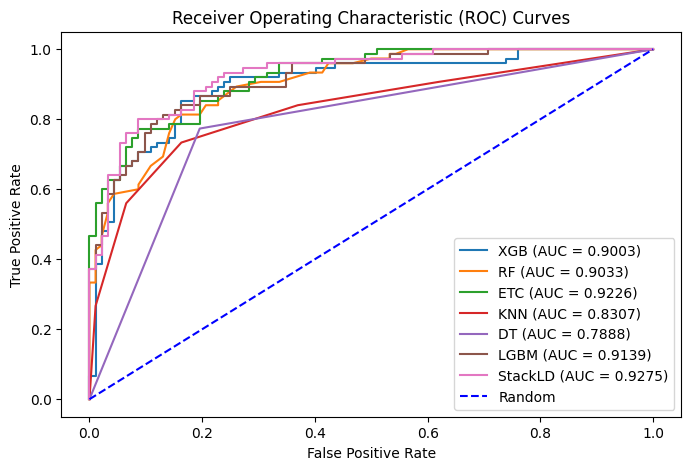

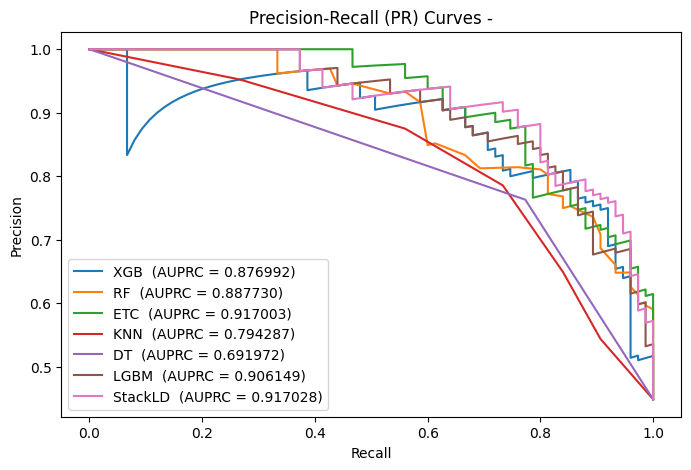

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Define the classifiers and their predictions
classifiers = [XGBClassifier(n_estimators=100, max_depth=100),
              RandomForestClassifier(n_estimators=50),
              ExtraTreesClassifier(n_estimators=10, min_samples_split=10),
              KNeighborsClassifier(),
              DecisionTreeClassifier(),
              LGBMClassifier(num_leaves=150, max_depth=100, learning_rate=0.1, n_estimators=100),


              StackingClassifier(estimators=[('xgb', xgb_model), ('rf', RandomForestClassifier(n_estimators=50)), ('ex', ex_model)],
                                 final_estimator=LogisticRegression(C=0.1))]
classifier_labels = ['XGB', 'RF','ETC','KNN','DT','LGBM','StackLD']
predictions_train = []
predictions_test = []

# Collect predictions for both training and test sets
for clf in classifiers:
    # Fit the classifier before making predictions
    clf.fit(X_train, y_train)

    if hasattr(clf, 'predict_proba'):

        pred_prob_test = clf.predict_proba(X_test)[:, 1]
    else:

        pred_prob_test = clf.predict(X_test)

    predictions_test.append(pred_prob_test)

# Plot ROC curves for both training and test sets
plt.figure(figsize=(8, 5))
for i in range(len(classifiers)):


    fpr_test, tpr_test, _ = roc_curve(y_test, predictions_test[i])
    roc_auc_test = auc(fpr_test, tpr_test)
    plt.plot(fpr_test, tpr_test, label=f'{classifier_labels[i]} (AUC = {roc_auc_test:.4f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='blue', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Plot Precision-Recall curves for both training and test sets
plt.figure(figsize=(8, 5))
for i in range(len(classifiers)):


    precision_test, recall_test, _ = precision_recall_curve(y_test, predictions_test[i])
    auprc_test = average_precision_score(y_test, predictions_test[i])
    plt.plot(recall_test, precision_test, label=f'{classifier_labels[i]}  (AUPRC = {auprc_test:.6f})')

plt.title('Precision-Recall (PR) Curves -')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


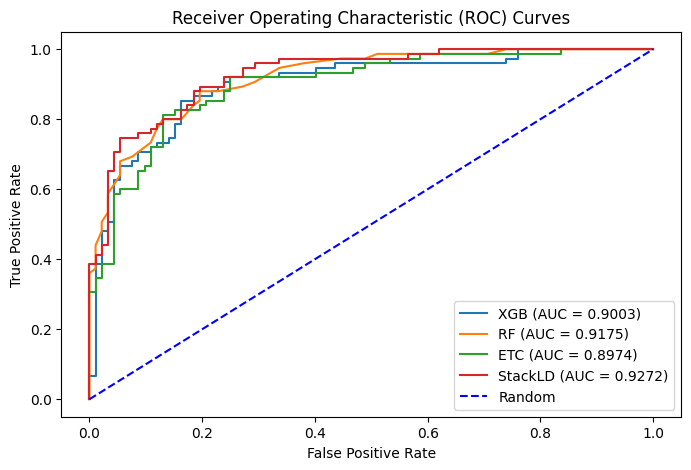

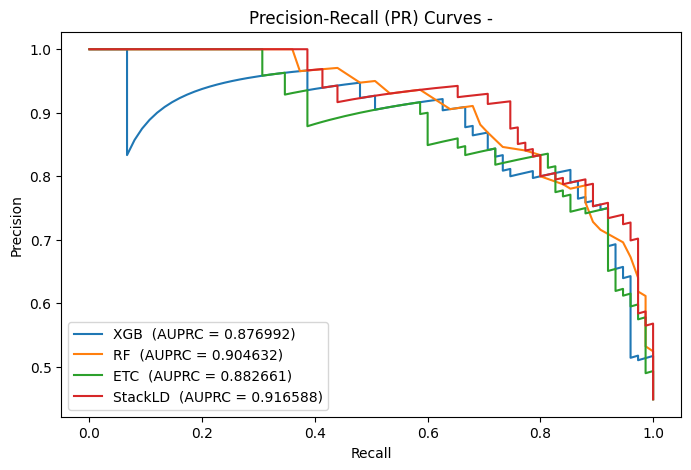

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Define the classifiers and their predictions
classifiers = [XGBClassifier(n_estimators=100, max_depth=100),
              RandomForestClassifier(n_estimators=50),
              ExtraTreesClassifier(n_estimators=10, min_samples_split=10),
              StackingClassifier(estimators=[('xgb', xgb_model), ('rf', RandomForestClassifier(n_estimators=50)), ('ex', ex_model)],
                                 final_estimator=LogisticRegression(C=0.1))]
classifier_labels = ['XGB', 'RF','ETC','StackLD']
predictions_train = []
predictions_test = []

# Collect predictions for both training and test sets
for clf in classifiers:
    # Fit the classifier before making predictions
    clf.fit(X_train, y_train)

    if hasattr(clf, 'predict_proba'):

        pred_prob_test = clf.predict_proba(X_test)[:, 1]
    else:

        pred_prob_test = clf.predict(X_test)

    predictions_test.append(pred_prob_test)

# Plot ROC curves for both training and test sets
plt.figure(figsize=(8, 5))
for i in range(len(classifiers)):


    fpr_test, tpr_test, _ = roc_curve(y_test, predictions_test[i])
    roc_auc_test = auc(fpr_test, tpr_test)
    plt.plot(fpr_test, tpr_test, label=f'{classifier_labels[i]} (AUC = {roc_auc_test:.4f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='blue', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Plot Precision-Recall curves for both training and test sets
plt.figure(figsize=(8, 5))
for i in range(len(classifiers)):


    precision_test, recall_test, _ = precision_recall_curve(y_test, predictions_test[i])
    auprc_test = average_precision_score(y_test, predictions_test[i])
    plt.plot(recall_test, precision_test, label=f'{classifier_labels[i]}  (AUPRC = {auprc_test:.6f})')

plt.title('Precision-Recall (PR) Curves -')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


In [ ]:
X = X_train_selected.drop("Selector", axis=1)
y = X_train_selected["Selector"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'X_train_selected' is not defined

In [ ]:
import shap


In [ ]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 6.8 MB/s eta 0:00:00


In [ ]:
stacking_classifier = StackingClassifier(estimators=[('xgb', xgb_model), ('rf', RandomForestClassifier(n_estimators=50)), ('ex', ex_model)],
                                         final_estimator=LogisticRegression(C=0.1))
stacking_classifier.fit(X_train, y_train)  # Make sure to replace X_train and y_train with your training data




StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_...
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('rf', RandomForestClassifier(n_estimators=50)),
                               ('ex',
                                ExtraTreesClassifier(min_samples_split=10,
                                                     n_estimators=10))],
                   final_estimator=LogisticRegression(C=0.1))

In [ ]:
!pip install LIME



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for LIME: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=1c009f39e245ca080e8f20aa6f666a1d0c11a044b3219aa7a975522ba6aec4bb
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built LIME


In [ ]:
from lime import lime_tabular


In [ ]:
explainer = lime_tabular.LimeTabularExplainer(X_test.values, feature_names=X_test.columns, class_names=['LD'], discretize_continuous=True)
instance = X_test.iloc[0]  # Pick any test instance
explanation = explainer.explain_instance(instance.values, stacking_classifier.predict_proba)
explanation.show_in_notebook()  # Use explanation.show_in_notebook() for Jupyter Notebooks



X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names


# Visualize

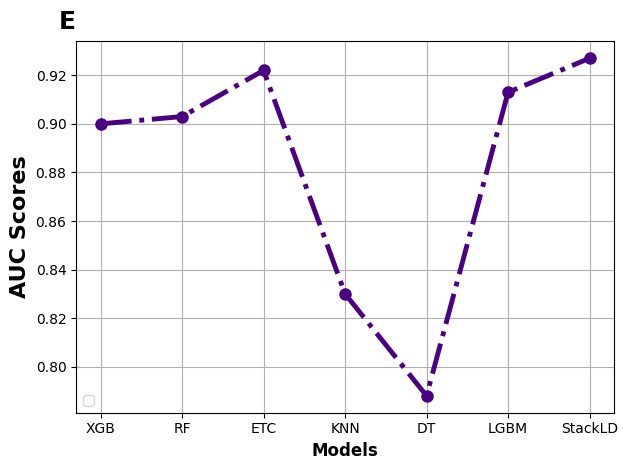

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data


average_values = [0.900, 0.903, 0.922, 0.830, 0.788, 0.913, 0.927]

models = ['XGB', 'RF', 'ETC', 'KNN', 'DT', 'LGBM', 'StackLD']

# Set wider line width and font weight
line_width = 3.5
font_weight = 'bold'

# Plot lines for each metric with adjusted line width and identical circle markers
plt.plot(models, average_values, marker='o',  linestyle='-.', color='indigo', markersize=8, linewidth=line_width)
  # You can adjust this value based on your preference

plt.xlabel('Models', fontweight=font_weight, fontsize=12)
plt.ylabel('AUC Scores', fontweight=font_weight, fontsize=16)

plt.text(0, 1.02, 'E', transform=plt.gca().transAxes, fontsize=18, weight=font_weight,
         verticalalignment='bottom', horizontalalignment='right')

# Add legend with bold text and align to left bottom
plt.legend(loc='lower left', prop={'weight': font_weight})

# Show the plot
plt.grid(True)
plt.tight_layout()

# Save the figure with high DPI and pixel dimensions
plt.savefig('B.png', dpi=600, bbox_inches='tight')

# Display the plot
plt.show()

# New dataset

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/liver deases/liver-disorders.csv")
# train['Gender'] = train['Gender'].replace({'Male': 1, 'Female': 2})
# train['Selector'] = train['Selector'].replace({1:1 , 2: 0})
# train['A/G Ratio'].fillna(train['A/G Ratio'].median(), inplace=True)

In [ ]:
train

id  'mcv'  'alkphos'  'sgpt'  'sgot'  'gammagt'  'drinks'  'selector'
0      1     85         92      45      27         31       0.0           1
1      2     85         64      59      32         23       0.0           2
2      3     86         54      33      16         54       0.0           2
3      4     91         78      34      24         36       0.0           2
4      5     87         70      12      28         10       0.0           2
..   ...    ...        ...     ...     ...        ...       ...         ...
340  341     99         75      26      24         41      12.0           1
341  342     96         69      53      43        203      12.0           2
342  343     98         77      55      35         89      15.0           1
343  344     91         68      27      26         14      16.0           1
344  345     98         99      57      45         65      20.0           1

[345 rows x 8 columns]

In [ ]:
train.columns = [col.replace("'", "") for col in train.columns]

# Display columns after renaming
print("\nColumns after renaming:")
print(train.columns)


Columns after renaming:
Index(['id', 'mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'drinks',
       'selector'],
      dtype='object')


In [ ]:
smote_balanced1['selector'].value_counts()

In [ ]:
train['selector'] = train['selector'].replace({1:1 , 2: 0})

In [ ]:
X = train.drop("selector", axis=1)
y = train["selector"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Smote

In [ ]:
X1 = train.drop("selector", axis=1)
y1 = train['selector']
smote = SMOTE(random_state=42)
X1_resampled_smote, y1_resampled_smote = smote.fit_resample(X1, y1)
smote_balanced1= pd.concat([X1_resampled_smote, y1_resampled_smote], axis=1)

In [ ]:
import pandas as pd
from scipy.stats import skew

# Assuming 'df' is your DataFrame
numerical_features = ['Age', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'A/G Ratio']

skewness_values = smote_balanced1[smote_balanced1.columns].apply(lambda x: skew(x))

# Display skewness values
skewness_df = pd.DataFrame({'Feature': skewness_values.index, 'Skewness': skewness_values.values})
print(skewness_df)

    Feature  Skewness
0        id  0.014130
1       mcv -0.370357
2   alkphos  0.748883
3      sgpt  2.987069
4      sgot  2.320032
5   gammagt  2.735516
6    drinks  1.475350
7  selector  0.000000


In [ ]:
from scipy.stats import boxcox

# Assuming 'df' is your DataFrame
transformed_sgot, _ = boxcox(smote_balanced1['Sgot'] + 1)  # Adding 1 to handle zero values
transformed_sgpt, _ = boxcox(smote_balanced1['Sgpt'] + 1)  # Adding 1 to handle zero values
transformed_tb, _ = boxcox(smote_balanced1['TB'] + 1)
# Replace the original 'Sgot' column with the transformed values
smote_balanced1['Sgot'] = transformed_sgot
smote_balanced1['Sgpt'] = transformed_sgpt
smote_balanced1['TB'] = transformed_tb

In [ ]:

X = smote_balanced1.drop("selector", axis=1)
y = smote_balanced1["selector"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling transformation to the test set
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, matthews_corrcoef, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

# Assuming you have X_train, X_test, y_train, and y_test defined

xgb_model = XGBClassifier(learning_rate=0.1)
rf_model = RandomForestClassifier(n_estimators=50)
ex_model = ExtraTreesClassifier(n_estimators=10,min_samples_split=10)
stk6 = StackingClassifier(estimators=[('xgb', xgb_model), ('rf', rf_model), ('ex', ex_model)], final_estimator=gb_model)


model_list = [XGBClassifier(n_estimators=100, max_depth=100),
              RandomForestClassifier(n_estimators=50),
              ExtraTreesClassifier(n_estimators=10, min_samples_split=10),
              KNeighborsClassifier(),
              DecisionTreeClassifier(),
              LGBMClassifier(num_leaves=150, max_depth=100, learning_rate=0.1, n_estimators=100),
              stk6]

results = []

for model in model_list:
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate sensitivity, specificity, and accuracy
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test, y_pred)

    # Calculate MCC (Matthews correlation coefficient)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)

    # Store the results in a dictionary
    result = {
        'Model': str(model),
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'AUC': auc_score,
        'MCC': mcc,
        'F1 Score': f1
    }

    # Append the result to the results list
    results.append(result)

# Print the results
for result in results:
    print(result)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 341, number of negative: 324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1012
[LightGBM] [Info] Number of data points in the train set: 665, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.512782 -> initscore=0.051139
[LightGBM] [Info] Start training from score 0.051139
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [ ]:
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
results_df.to_csv(' FINALmodel_results.csv', index=False)

# Print the results
print(results_df)

                                               Model  Accuracy  Sensitivity  \
0  XGBClassifier(base_score=None, booster=None, c...  0.838323     0.853333   
1            RandomForestClassifier(n_estimators=50)  0.844311     0.826667   
2  ExtraTreesClassifier(min_samples_split=10, n_e...  0.814371     0.746667   
3                             KNeighborsClassifier()  0.790419     0.733333   
4                           DecisionTreeClassifier()  0.784431     0.760000   
5      LGBMClassifier(max_depth=100, num_leaves=150)  0.832335     0.826667   
6  StackingClassifier(estimators=[('xgb',\n      ...  0.784431     0.840000   

   Specificity       AUC       MCC  F1 Score  
0     0.826087  0.839710  0.676485  0.825806  
1     0.858696  0.842681  0.685362  0.826667  
2     0.869565  0.808116  0.623874  0.783217  
3     0.836957  0.785145  0.574891  0.758621  
4     0.804348  0.782174  0.564348  0.760000  
5     0.836957  0.831812  0.662185  0.815789  
6     0.739130  0.789565  0.576629  0.

## paper applied model

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
# Assuming you have y_test for your true labels

# List to store results
results = []


rf_model = RandomForestClassifier(n_estimators=50)
et_model = ExtraTreesClassifier(n_estimators=10, min_samples_split=10)
xgb_model = XGBClassifier(n_estimators=100, max_depth=100)
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, random_state=42)

# Function to calculate specificity
def calculate_specificity(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)
    return specificity

# Iterate through models
for model, model_name in zip([rf_model, et_model, xgb_model, gb_model],
                             ['Random Forest', 'Extra Tree Classifier', 'XGBoost', 'Gradient Boosting']):
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    specificity = calculate_specificity(conf_matrix)
    sensitivity = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Append results to the list
    results.append([model_name, accuracy, specificity, sensitivity, f1])

# Display results as CSV
import pandas as pd
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Specificity', 'Sensitivity', 'F1 Score'])
print(results_df)

# Save results to CSV
results_df.to_csv('model_results.csv', index=False)


                   Model  Accuracy  Specificity  Sensitivity  F1 Score
0          Random Forest  0.820359     0.847826     0.786667  0.797297
1  Extra Tree Classifier  0.814371     0.858696     0.760000  0.786207
2                XGBoost  0.838323     0.826087     0.853333  0.825806
3      Gradient Boosting  0.796407     0.760870     0.840000  0.787500


# model validation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import PowerTransformer

# Load your dataset
# Assuming your dataset is in a CSV file named 'your_dataset.csv'
train = pd.read_csv("/content/drive/MyDrive/liver deases/liver.csv")
train['Gender'] = train['Gender'].replace({'Male': 1, 'Female': 2})
train['Selector'] = train['Selector'].replace({1:1 , 2: 0})
train['A/G Ratio'].fillna(train['A/G Ratio'].median(), inplace=True)

X1 = train.drop("Selector", axis=1)
y1 = train['Selector']
smote = SMOTE(random_state=42)
X1_resampled_smote, y1_resampled_smote = smote.fit_resample(X1, y1)
smote_balanced1= pd.concat([X1_resampled_smote, y1_resampled_smote], axis=1)




# Step 3: Imputation with IterativeImputer


# Step 4: Log1p Transformation on Skewed Columns
skewed_columns = smote_balanced1.columns[smote_balanced1.apply(lambda x: x.skew()) > 0.5]
smote_balanced1[skewed_columns] = np.log1p(smote_balanced1[skewed_columns])
# X_test[skewed_columns] = np.log1p(X_test[skewed_columns])

# Step 2: Train-Test Split
X = smote_balanced1.drop('Selector', axis=1)
y = smote_balanced1['Selector']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature Scaling using various techniques
scalers = [StandardScaler(), MinMaxScaler(), MaxAbsScaler(), RobustScaler()]
for scaler in scalers:
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # Further processing or model training can be done using the scaled data

    # Step 6: Feature Selection using SelectKBest with ANOVA F-statistic
    k_best_selector = SelectKBest(f_classif, k='all')
    X_train_selected = k_best_selector.fit_transform(X_train_scaled, y_train)
    X_test_selected = k_best_selector.transform(X_test_scaled)

    # Further steps may include model training using the selected features and evaluating the model's performance.
    # Example using RandomForestClassifier:
    clf = gb_model
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy after preprocessing: {accuracy}")
    print('new way')


Accuracy after preprocessing: 0.7964071856287425
new way
Accuracy after preprocessing: 0.7964071856287425
new way
Accuracy after preprocessing: 0.7964071856287425
new way
Accuracy after preprocessing: 0.7964071856287425
new way


In [ ]:
et_model = ExtraTreesClassifier(n_estimators=100, criterion='entropy',
                                min_samples_split=2, min_samples_leaf=1,
                                max_leaf_nodes=None)
et_model.fit(X_train_selected, y_train)
et_predictions = et_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after preprocessing: {accuracy}")

Accuracy after preprocessing: 0.8383233532934131


In [ ]:
import pandas as pd

# Load your dataset
# Assuming your dataset is in a CSV file named 'your_dataset.csv'
# df = pd.read_csv("/content/drive/MyDrive/liver deases/liver.csv")

# Step 1: Check for duplicate rows
duplicates = df[df.duplicated()]

# Step 2: Remove duplicate rows
df_no_duplicates = df.drop_duplicates()

# Step 3: Save the new dataset without duplicates
df_no_duplicates.to_csv('your_dataset_no_duplicates.csv', index=False)


In [ ]:
df_no_duplicates.shape

(1124, 10)

In [ ]:

df_no_duplicates['Gender'] = df_no_duplicates['Gender'].replace({'Male': 1, 'Female': 2})
df_no_duplicates['Selector'] = df_no_duplicates['Selector'].replace({1:1 , 2: 0})
df_no_duplicates['A/G Ratio'].fillna(df_no_duplicates['A/G Ratio'].median(), inplace=True)

In [ ]:
X1 = df_no_duplicates.drop("Selector", axis=1)
y1 = df_no_duplicates['Selector']
smote = SMOTE(random_state=42)
X1_resampled_smote, y1_resampled_smote = smote.fit_resample(X1, y1)
smote_balanced1= pd.concat([X1_resampled_smote, y1_resampled_smote], axis=1)

In [ ]:
X = smote_balanced1.drop('Selector', axis=1)
y = smote_balanced1['Selector']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

# Assuming X_train, y_train, X_test, and y_test are defined

# Initialize classifiers
xgb = XGBClassifier(learning_rate=0.1)
rf = RandomForestClassifier(n_estimators=50)
ex = ExtraTreesClassifier(n_estimators=10, min_samples_split=10)
stk6 = StackingClassifier(estimators=[('xgb', xgb), ('rf', rf), ('ex', ex)], final_estimator=LogisticRegression(C=0.1))

# Lists to store metrics for each run
accuracy_list = []
f1_list = []
conf_matrix_list = []

# Run the classifiers 10 times
for _ in range(50):
    stk6.fit(X_train, y_train)
    y_pred = stk6.predict(X_test)

    # Calculate metrics
    accuracy_lr = accuracy_score(y_test, y_pred)
    f1_lr = f1_score(y_test, y_pred)
    conf_matrix_lr = confusion_matrix(y_test, y_pred)

    # Append metrics to the lists
    accuracy_list.append(accuracy_lr)
    f1_list.append(f1_lr)
    conf_matrix_list.append(conf_matrix_lr)

# Calculate maximum, median, and average metrics
max_accuracy = np.max(accuracy_list)
median_accuracy = np.median(accuracy_list)
average_accuracy = np.mean(accuracy_list)

max_f1 = np.max(f1_list)
median_f1 = np.median(f1_list)
average_f1 = np.mean(f1_list)

# Find the confusion matrix with maximum accuracy
conf_matrix_max_accuracy = conf_matrix_list[np.argmax(accuracy_list)]

# Print results
print("Maximum Accuracy:", max_accuracy)
print("Median Accuracy:", median_accuracy)
print("Average Accuracy:", average_accuracy)

print("\nMaximum F1 Score:", max_f1)
print("Median F1 Score:", median_f1)
print("Average F1 Score:", average_f1)

print("\nConfusion Matrix with Maximum Accuracy:")
print(conf_matrix_max_accuracy)


Maximum Accuracy: 0.8622754491017964
Median Accuracy: 0.844311377245509
Average Accuracy: 0.8432335329341316

Maximum F1 Score: 0.8535031847133757
Median F1 Score: 0.8322510822510822
Average F1 Score: 0.8320938174381386

Confusion Matrix with Maximum Accuracy:
[[78 14]
 [ 9 66]]


In [ ]:
!pip install lazypredict


In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have a dataset (X, y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LazyClassifier
clf = LazyClassifier()

# Fit and predict
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)
results_df = pd.DataFrame(models)
results_df.to_csv('a.csv', index=False)

 97%|█████████▋| 28/29 [00:04<00:00,  5.47it/s]

[LightGBM] [Info] Number of positive: 341, number of negative: 324
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 901
[LightGBM] [Info] Number of data points in the train set: 665, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.512782 -> initscore=0.051139
[LightGBM] [Info] Start training from score 0.051139
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

100%|██████████| 29/29 [00:05<00:00,  5.52it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.87               0.86     0.86      0.87   
XGBClassifier                      0.85               0.85     0.85      0.85   
RandomForestClassifier             0.84               0.84     0.84      0.84   
LGBMClassifier                     0.82               0.82     0.82      0.82   
BaggingClassifier                  0.83               0.82     0.82      0.82   
DecisionTreeClassifier             0.81               0.81     0.81      0.81   
AdaBoostClassifier                 0.76               0.76     0.76      0.76   
RidgeClassifierCV                  0.77               0.76     0.76      0.77   
RidgeClassifier                    0.77               0.76     0.76      0.77   
LinearSVC                          0.77               0.76     0.76      0.77   
NuSVC                       

In [ ]:
from keras.layers import Embedding
from keras.models import Sequential

# Sample protein sequence
protein_sequence = "ACDEFGHIKLMNPQRSTVWY"

# Create a model with an embedding layer
model = Sequential()
model.add(Embedding(input_dim=len(protein_sequence), output_dim=50, input_length=len(protein_sequence)))

# Dummy input data (replace with your actual data)
input_data = np.random.randint(len(protein_sequence), size=(1, len(protein_sequence)))

# Get the embeddings for the input data
embeddings = model.predict(input_data)

print(embeddings)


1/1 [==============================] - 0s 74ms/step
[[[ 3.65594737e-02 -1.82004794e-02  2.06639618e-03 -1.67352930e-02
   -4.53310721e-02 -4.39066775e-02  4.24274094e-02 -2.62839682e-02
    3.45140696e-03 -4.71942537e-02 -1.97843071e-02  1.33263953e-02
    3.98785807e-02  3.10549252e-02 -3.53755839e-02 -3.46017592e-02
    8.08087736e-03  2.55380161e-02  3.11613344e-02 -1.71931386e-02
   -4.79954481e-03 -2.40747575e-02  3.71963903e-03 -6.50943443e-03
    3.95688303e-02 -3.59960645e-03 -1.52861252e-02  6.54812902e-03
    2.51295827e-02 -4.15116772e-02 -2.83999331e-02  2.43662260e-02
    4.30012010e-02  1.34226196e-02 -1.35718584e-02 -1.12931356e-02
    2.07850672e-02  3.83677818e-02  1.66455172e-02  3.27349193e-02
   -1.20312795e-02 -1.99599620e-02 -9.78643820e-03  4.09388058e-02
    3.57278697e-02 -3.46979722e-02  3.78004573e-02 -3.38758118e-02
   -1.80410147e-02 -1.07881427e-02]
  [-4.35812846e-02  1.81769617e-02 -2.81032566e-02 -3.26474756e-03
    4.39919271e-02 -3.36797386e-02 -1.397

In [ ]:
len(embeddings)

1